# Logistic Regression
+ binary classification 문제에서 쓰이는 대표적인 algorithm
+ Hypothesis는 이전과 달리 $H(x) = f(Wx+b)$ 이용 
+ Logistic regression은 s자 모양의 graph를 띄는데 여기서 sigmoid function를 사용함

## Sigmoid function
$H(x) = sigmoid(Wx+b) = \frac{1}{1+e^{-(Wx+b)}}= \sigma (Wx+b)$ 


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

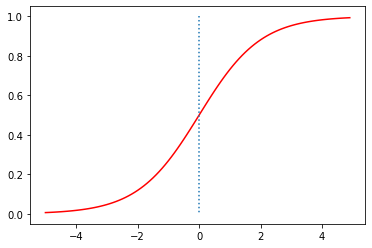

In [2]:
# define sigmoid function 
def sigmoid(x):
    return 1/(1+np.exp(-x))

# w가 1이고 b가 0
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

'''
x가 0일 때 0.5의 값을 가짐 
x가 매우 커지면 1에 수렴 
x가 매우 작아지면 0에 수렴
'''

plt.plot(x, y, 'r')
plt.plot([0,0],[1.0,0.0], ':') 
plt.show()


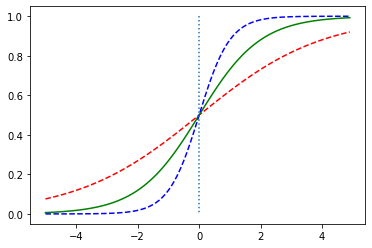

In [3]:
# w값 변화에 따른 slope의 변화 
x = np.arange(-5.0,5.0,0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

'''
w 값이 높을 수록 경사가 커지고
낮을 수록 낮아짐  
'''
plt.plot(x, y1, 'r', linestyle = '--')
plt.plot(x,y2, 'g')
plt.plot(x,y3, 'b', linestyle = '--')
plt.plot([0,0],[1.0,0.0],':')
plt.show()

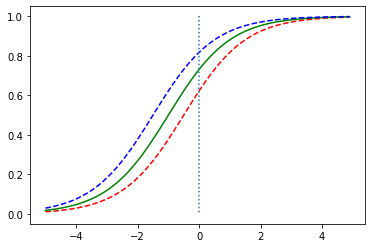

In [4]:
# b값 변화에 따른 이동 
x = np.arange(-5.0,5.0,0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

'''
b값이 커질수록 좌측으로 이동,
작을수록 우측으로 이동
'''
plt.plot(x, y1, 'r', linestyle = '--')
plt.plot(x,y2, 'g')
plt.plot(x,y3, 'b', linestyle = '--')
plt.plot([0,0],[1.0,0.0],':')
plt.show()

## Cost function
+ sigmoid function을 적용한 MSE는 Non-Convex problem이 됨\
<img src="https://wikidocs.net/images/page/22881/%EB%A1%9C%EC%BB%AC%EB%AF%B8%EB%8B%88%EB%A9%88.PNG">

+ local mimimum에 빠질 수 있음 
+ sigmoid function의 출력값은 0과 1 사이 값을 가지므로, 실제값이 0이고 예측값이 1에 가까워지면 오차가 커져야 함
    + 이를 충족하기 위해 hypothesis에 $-\log$를 취함
    + $if \ y = 1 -> cost(H(x),y) = -\log(H(x))$
    + $if \ y = 0 -> cost(H(x),y) = -\log(1-H(x))$\
    $cost(W) = - \frac{1}{n} \sum_{i=1}^{n} [y^{(i)}\log H(x^{(i)})+(1-y^{(i)})\log (1-H(x^{(i)}))]$
        + $y$: real value   
        + $x$: input value

In [5]:
# implement logistic regression

# import module
import torch 
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim

# seed
torch.manual_seed(1)

In [6]:
# data
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]] # 6 by 2
y_data = [[0], [0], [0], [1], [1], [1]] # 6 by 1
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

# initialize model
w = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# set optimizer
opt = optim.SGD([w,b], lr=1)
# number of epochs
n_epoch = 1000

for epoch in range(n_epoch+1):
    hyp = torch.sigmoid(x_train.matmul(w)+b)
    cost = -(y_train * torch.log(hyp)
             + (1-y_train)*torch.log(1-hyp)).mean()
    
    opt.zero_grad()
    cost.backward()
    opt.step()
    
    if epoch % 100==0:
        print(f'Epoch {epoch}/{n_epoch}  cost: {cost.item():.6f}')

Epoch 0/1000  cost: 0.693147
Epoch 100/1000  cost: 0.134722
Epoch 200/1000  cost: 0.080643
Epoch 300/1000  cost: 0.057900
Epoch 400/1000  cost: 0.045300
Epoch 500/1000  cost: 0.037261
Epoch 600/1000  cost: 0.031673
Epoch 700/1000  cost: 0.027556
Epoch 800/1000  cost: 0.024394
Epoch 900/1000  cost: 0.021888
Epoch 1000/1000  cost: 0.019852


In [7]:
# validation 
hyp = torch.sigmoid(x_train.matmul(w)+b)
print(hyp)

# if over 0.5 is true then false 
pred = hyp >= torch.FloatTensor([0.5])
print(pred)

print(f'w: {w} \n b: {b}')

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)
tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])
w: tensor([[3.2530],
        [1.5179]], requires_grad=True) 
 b: tensor([-14.4819], requires_grad=True)


# Logistic regression with nn.Module


In [8]:
# seed 
torch.manual_seed(1)

# train data
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [14]:
# model 
mod = nn.Sequential(
    nn.Linear(2,1), # input dimension is 2, output dimension is 1 
    nn.Sigmoid()
)

opt = optim.SGD(mod.parameters(), lr=1)
n_epoch = 1000

for epoch in range(n_epoch+1):
    hyp = mod(x_train)
    cost = F.binary_cross_entropy(hyp, y_train)
    
    opt.zero_grad()
    cost.backward()
    opt.step()
    
    if epoch % 100 == 0:
        pred = hyp >= torch.FloatTensor([0.5]) # 예측겂아 0.5를 넘으면 True로 간주
        corr_pred = pred.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        acc = corr_pred.sum().item() / len(corr_pred) # accuracy
        
        print(f'Epoch {epoch:4d}/{n_epoch} Cost: {cost.item():.6f} Accuracy {acc*100:2.2f}%')
    

Epoch    0/1000 Cost: 0.734527 Accuracy 50.00%
Epoch  100/1000 Cost: 0.134652 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080619 Accuracy 100.00%
Epoch  300/1000 Cost: 0.057888 Accuracy 100.00%
Epoch  400/1000 Cost: 0.045292 Accuracy 100.00%
Epoch  500/1000 Cost: 0.037256 Accuracy 100.00%
Epoch  600/1000 Cost: 0.031669 Accuracy 100.00%
Epoch  700/1000 Cost: 0.027553 Accuracy 100.00%
Epoch  800/1000 Cost: 0.024392 Accuracy 100.00%
Epoch  900/1000 Cost: 0.021887 Accuracy 100.00%
Epoch 1000/1000 Cost: 0.019851 Accuracy 100.00%


In [17]:
# validation
print(mod(x_train))

# parameters after train
print(list(mod.parameters()))


tensor([[2.7643e-04],
        [3.1606e-02],
        [3.8974e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)
[Parameter containing:
tensor([[3.2531, 1.5179]], requires_grad=True), Parameter containing:
tensor([-14.4822], requires_grad=True)]


# Logistic regression with Class

In [18]:
torch.manual_seed(1)

# data
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [21]:
# model class
class BinartClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(2,1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        return self.sigmoid(self.linear(x))
    
mod = BinartClassifier()

In [22]:
opt = optim.SGD(mod.parameters(), lr=1)

n_epoch = 1000

for epoch in range(n_epoch+1):
    hyp = mod(x_train)
    cost = F.binary_cross_entropy(hyp, y_train)
    
    opt.zero_grad()
    cost.backward()
    opt.step()
    
    if epoch % 100 == 0:
        pred = hyp >= torch.FloatTensor([0.5]) # 예측겂아 0.5를 넘으면 True로 간주
        corr_pred = pred.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        acc = corr_pred.sum().item() / len(corr_pred) # accuracy
        
        print(f'Epoch {epoch:4d}/{n_epoch} Cost: {cost.item():.6f} Accuracy {acc*100:2.2f}%')

Epoch    0/1000 Cost: 0.614994 Accuracy 66.67%
Epoch  100/1000 Cost: 0.140280 Accuracy 100.00%
Epoch  200/1000 Cost: 0.082549 Accuracy 100.00%
Epoch  300/1000 Cost: 0.058858 Accuracy 100.00%
Epoch  400/1000 Cost: 0.045878 Accuracy 100.00%
Epoch  500/1000 Cost: 0.037649 Accuracy 100.00%
Epoch  600/1000 Cost: 0.031951 Accuracy 100.00%
Epoch  700/1000 Cost: 0.027766 Accuracy 100.00%
Epoch  800/1000 Cost: 0.024558 Accuracy 100.00%
Epoch  900/1000 Cost: 0.022020 Accuracy 100.00%
Epoch 1000/1000 Cost: 0.019960 Accuracy 100.00%
